Zadanie 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
dane = pd.read_csv(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Komputerowa-analiza-szeregow-czasowych\dane1.txt", delim_whitespace=True, header=None)

In [6]:
objasniajaca = dane[0]
objasniana = dane[1]

In [13]:
def func(a,b,x):
    return a*x+b
parametry, _ = curve_fit(func, objasniajaca, objasniana)

In [17]:
b,a = parametry

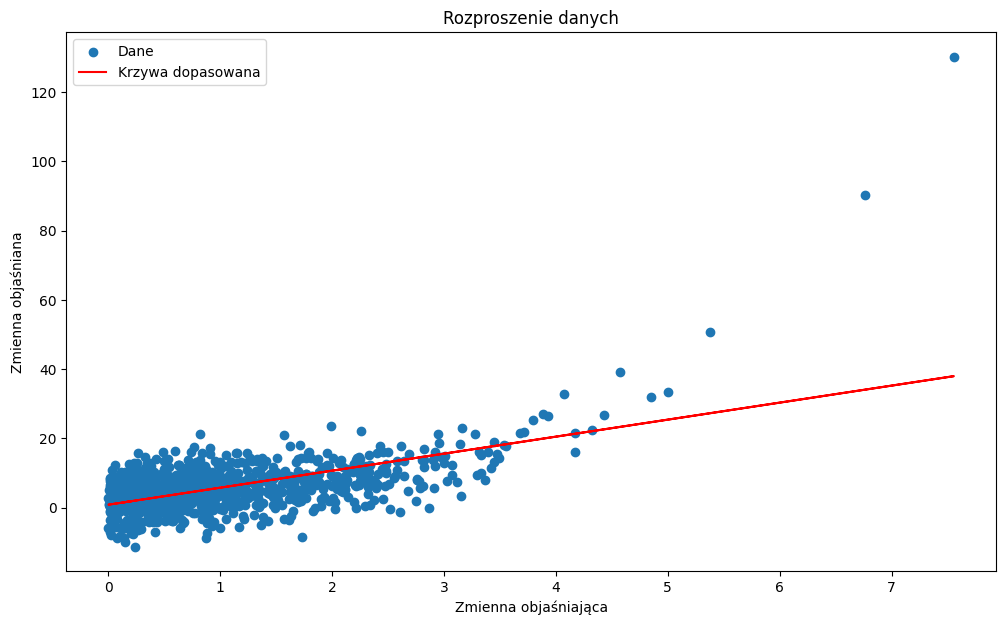

In [21]:
plt.figure(figsize=(12,7))
plt.scatter(objasniajaca, objasniana, label='Dane')
plt.plot(objasniajaca, func(a,b,objasniajaca), color="r", label="Krzywa dopasowana")
plt.title('Rozproszenie danych')
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.legend()
plt.show()

Zadanie 3